# Integración Montecarlo

$\textbf{Definici\'on:}$ El valor esperado de $g(x)$, función de la variable aleatoria $X$, para el caso en que $X$ sea una v.a continiua con función de densidad de probabilidad $f(x)$, se define como:

$$E[g(X)]:= \int\limits_{-\infty}^{\infty} g(x)f(x) dx $$


$\textbf{Teorema}: \textit{Ley fuerte de los grandes n\'umeros.}$ 

Sea $X_{1},X_{2},\cdots, X_{n}$ una sucesión de variables aleatorias independientes e indénticamente distribuidas con media $\mu$, se tiene que

$$ \lim_{x\to\infty} \frac{X_{1}+\cdots + X_{n}}{n}=\mu$$


La ley fuerte de los grandes números y la definicion de valor esperado para una distribución de probabilidad continua  es el fundamento de la integración de Monte Carlo, ya que permirte interpretar una integral $\int\limits_{a}^{b} g(x) dx$ como el valor esperado de la función $g(x)$, es decir, $\mu$, pero recordemos que de la definición se utiliza una funcion $f(x)$, para términos de comodidad se utiliza la funcion uniforme que esta definda como:

$$f(x)=Uni(a,b)=\frac{1}{b-a}$$


Por lo que podemos hacer la siguiente sustitución:

$$I=\int_{a}^{b} g(x) dx = \int_{a}^{b} w(x)g(x) dx$$

con:

* $w(x)=g(x)(b-a)$.
* $f(x)=\frac{1}{b-a}$.

Por lo tanto la integral transformada como un multiplo del valor esperado de $g(x)$ bajo la distribución uniforme:

$$E[g(X)] = \frac{I}{b-a}$$, Con $X\sim Uni(a,b)$


Si tomamos una muestra de número pseudoalatorios uniformemente distribuidos, por la ley de los grandes numeros, con $N$ suficientemente grande($N \rightarrow \infty$) tenemos que, con probabilidad 1:

$$\frac{1}{N} \sum_{i=1}^{N} g(X_{i})  \rightarrow E[g(X)] = \frac{I}{b-a} $$


Si despejamos I de la expresión anterior tenemos que:

$$I = (b-a)E[g(X)] $$
Y sea 
$$\theta= \frac{b-a}{N}\sum_{i=1}^{N} g(X_{i}) $$

un estimador insesgado de $I$, con $X_{i} \sim Uni(0,1)$

Por lo que el algoritmo queda de la siguiente manera:

$\textbf{Monte Carlo de la Media Muestral}$

* Paso 1: Generar una secuencia
* Paso 2: Calcular $X_{i}=a+U_{i}(b-a)$
* Paso 3: Calcular $g(X_{i})$, para $i=1,\cdots,n.$}
* Paso 4: Estimar $I$ calculando la media muestral de $\theta$


Programandolo

In [32]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

In [2]:
#Programam de la función.

def g(x):
    return np.sqrt(np.arctan(x))

In [14]:
def INT_MC(N,a,b):
    C=[] # Matriz Vacia donde se almacenaran los datos
    h=(b-a) #PFactor para recuperar la I 
    for i in range(N):
        x=rd.random() # V.A con disribución Uniforme.
        X=a+x*h
        k=g(X)
        C.append(k)
        
    

    return np.mean(C)

In [15]:
from scipy.integrate import quad

N = 1000  # Número total de puntos de muestreo
estimaciones = []

a = 0
b = 1

# Calcular la integral
result, error = quad(g, a, b)







In [16]:
for i in range(1, N + 1):
    estimacion = INT_MC(i, a, b)
    estimaciones.append(estimacion)

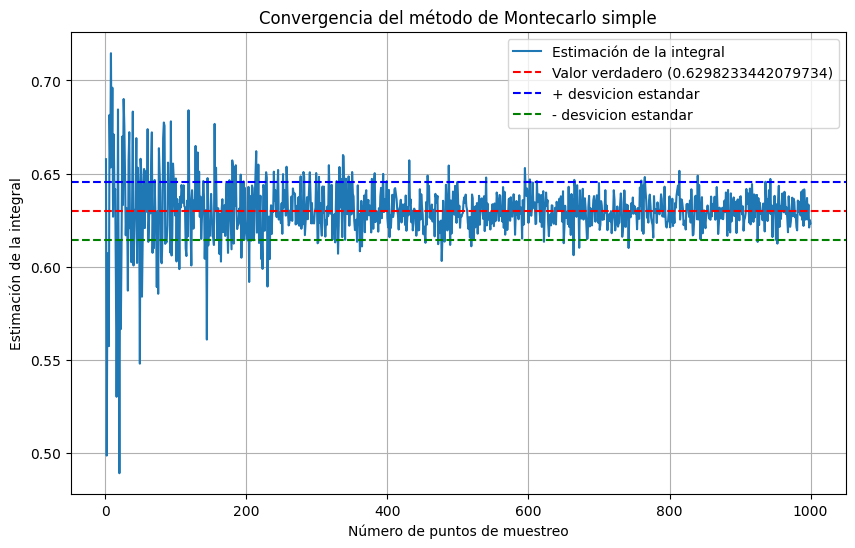

In [17]:


plt.figure(figsize=(10, 6))
plt.plot(range(1, N + 1), estimaciones, label='Estimación de la integral')
plt.axhline(y=result, color='r', linestyle='--', label='Valor verdadero (0.6298233442079734)')
plt.axhline(y=np.mean(estimaciones)+np.std(estimaciones, ddof=1), color='b', linestyle='--', label='+ desvicion estandar')
plt.axhline(y=np.mean(estimaciones)-np.std(estimaciones, ddof=1), color='g', linestyle='--', label='- desvicion estandar')
plt.xlabel('Número de puntos de muestreo')
plt.ylabel('Estimación de la integral')
plt.title('Convergencia del método de Montecarlo simple')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# Simulacion con un tamaño de muestra de 50

def sim_MC(n,a,b):
    G=[]
    for i in range(n):
        approx= INT_MC(50,a,b)
        G.append(approx)
        
        

    return G

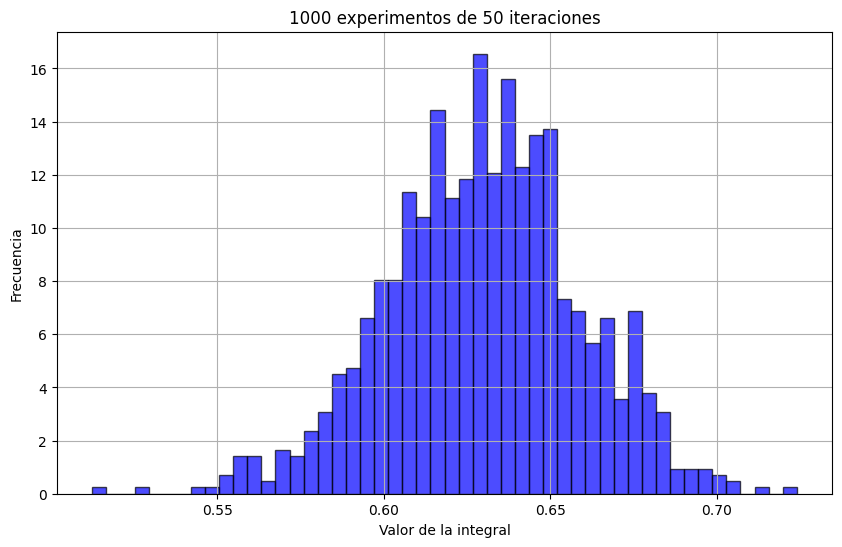

In [13]:
U=sim_MC(1000,0,1)



plt.figure(figsize=(10, 6))
plt.hist(U, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')

# Agregar etiquetas y título
plt.xlabel('Valor de la integral')
plt.ylabel('Frecuencia')
plt.title('1000 experimentos de 50 iteraciones')
plt.grid(True)

# Mostrar la gráfica
plt.show()

In [14]:
print("El valor de la integral es:",np.mean(U))

El valor de la integral es: 0.6297688759682163


## Método de Monte Carlo de acierto y error. 

Consiste en interpretar la integral como el área bajo la curva en una región rectangular $\{0 \leq  x \leq 1 \} X \{ 0 \leq g(x) \leq c \}$ , para algún valor $c$ que acote la función en todo el intervalo de integración, y generar $n$ puntos aleatorios $(x,y)$ sobre dicho rectángulo. Luego, la probabilidad de acertar a la región bajo la curva es:


$$p=\frac{\int_{a}^{b} g(x) dx}{c(b-a)} $$


donde el parémetro $p$ puede ser estimado de:

$$ \hat{p}=\frac{n_{a}}{n}  $$

* $n_{\alpha}: $ número de puntos bajo la curva, es decir, los aciertos.
* $n:$ el número total de intentos.

Por lo que la integrak puede ser estimada por:

$$ I \approx \theta_{1} = c(b-a)\frac{n_{a}}{n} $$

Al ser $v.a$ independientes, este procedimiento define un experimento de Bernoulli con probabilidad $p$, por lo que $\theta_{1}$ es un estimador insesgado de $I$,

$$E[\theta_{1}] = c(b-a)E[\frac{n_{a}}{n} ]=pc(b-a)=I.$$


Con varianza

$$  Var(\theta_{1})=\frac{1}{n} \left[ c(b-a)-I \right]    $$


$$\Rightarrow \sigma_{\theta_{1}}=\frac{\sqrt{I(c(b-a)-I)}   }{\sqrt{n}}$$


Puede observarse que la precisión del estimador es de orden $n^{-\frac{1}{2}}$.

Cuando $n\to\infty$ por el teorema del límite central a la variables $\hat{\theta}=\frac{\theta_{1}-I}{\sigma_{\theta_{1}}}$ se tiene que el intervalo de confianza con  nivel de $1-2\alpha$ para $I$ es:

$$ \theta_{1} \pm  z_{\alpha} \frac{ \sqrt{ \hat{p}(1-\hat{p})   }(b-a)c    }{\sqrt{n}}  $$

donde $z_{\alpha } = \phi^{-1}$ es la inversa de la distribucion normal.

## _______________________________________________________________
$\textbf{M\'etodo Monte Carlo de acierto y error.}$
## _______________________________________________________________

* Paso 1: Generar una secuencia $\{ U_{i} \}_{i=1}^{2n} \sim Uni(0,1) $.
* Paso 2: Conformar pares $(U_{i},U_{i+1})$, para $i=1, \cdots, n.$
* Paso 3: Calcular $X_{i}=a + U_{i}(b-a)$, para $i=1,\cdots, n$.
* Paso 4: Contar los aciertos $n_{a}$ tales que $g(X_{I}) > c U_{i+1}$.
* Paso 6: Estimar $I$ calculando la media muestral de $\theta_{1}$.


In [43]:
def MC_AE( a, b, N):
    U = np.random.uniform(0, 1, 2*N)
    pares = U.reshape(N, 2)
    
    aciertos = 0
    
    for i in range(N):
        X_i = a + pares[i, 0] * (b - a)
        if g(X_i) > b * pares[i, 1]:
            aciertos += 1
    
    theta_2 = aciertos / N
    I = (b - a) * b * theta_2
    return I

In [44]:
N=1000
a=0
b=1
j=MC_AE(a,b,N)

In [45]:
estimaciones_AE=[]
for i in range(1, N + 1):
    estimacion = MC_AE( a, b,i)
    estimaciones_AE.append(estimacion)

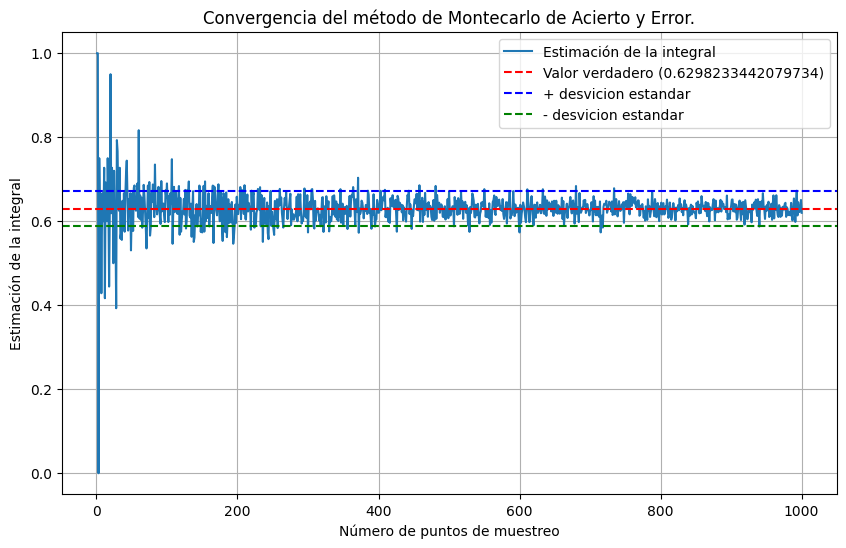

In [49]:


plt.figure(figsize=(10, 6))
plt.plot(range(1, N + 1), estimaciones_AE, label='Estimación de la integral')
plt.axhline(y=result, color='r', linestyle='--', label='Valor verdadero (0.6298233442079734)')

plt.axhline(y=np.mean(estimaciones_AE)+np.std(estimaciones_AE, ddof=1), color='b', linestyle='--', label='+ desvicion estandar')
plt.axhline(y=np.mean(estimaciones_AE)-np.std(estimaciones_AE, ddof=1), color='g', linestyle='--', label='- desvicion estandar')
plt.xlabel('Número de puntos de muestreo')
plt.ylabel('Estimación de la integral')
plt.title('Convergencia del método de Montecarlo de Acierto y Error.')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
# Simulacion con un tamaño de muestra de 50

def sim_MCAE(n,a,b):
    G=[]
    for i in range(n):
        approx= MC_AE(a,b,50)
        G.append(approx)
        
        

    return G

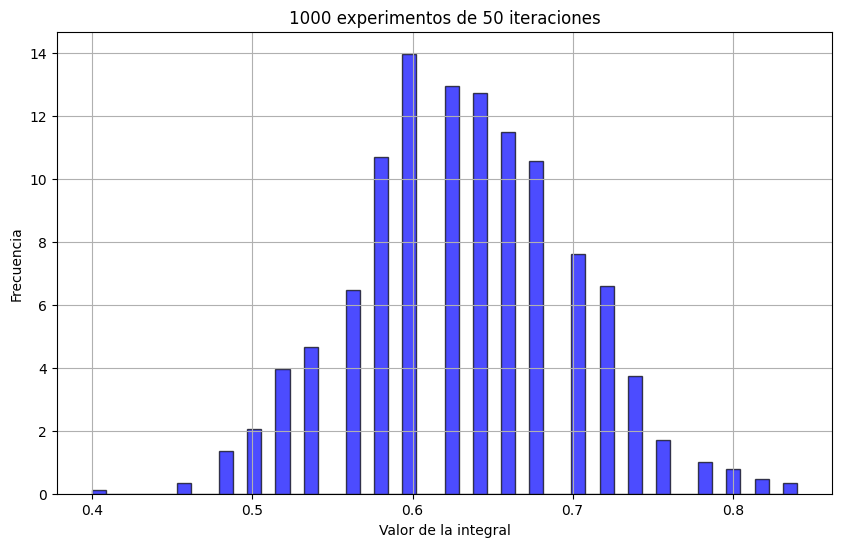

In [48]:
F=sim_MCAE(1000,0,1)



plt.figure(figsize=(10, 6))
plt.hist(F, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')

# Agregar etiquetas y título
plt.xlabel('Valor de la integral')
plt.ylabel('Frecuencia')
plt.title('1000 experimentos de 50 iteraciones')
plt.grid(True)

# Mostrar la gráfica
plt.show()

Calculo del intervalo de confianza: